In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt


# TASK 2A: APPLICATION OF CLASSIFICATION ALGORITHMS

Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 28, 'p': 1, 'weights': 'uniform'}
Accuracy score: 0.39345238095238094
Test set accuracy: 0.3442622950819672


Text(0.5, 1.0, 'Confusion Matrix of KNN')

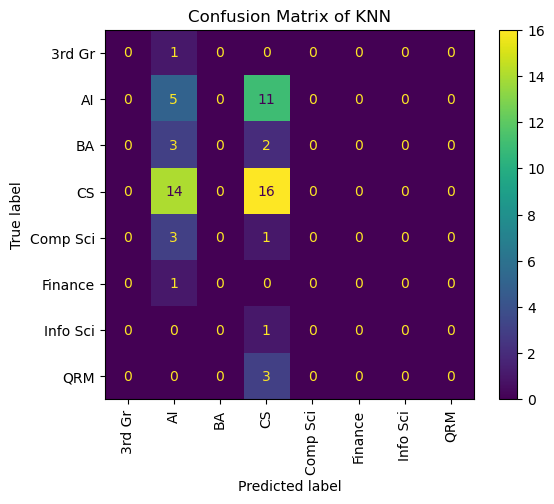

In [2]:
# Load the dataset
iris = pd.read_csv('new_data_fill_missing_linear&mode.csv')
iris = iris.dropna()

# Separate target variable and feature variables
target = iris['What programme are you in?']
iris = iris.drop(['What programme are you in?',"Tijdstempel",'Give a random number','What makes a good day for you (1)?',
                 'What makes a good day for you (2)?','When is your birthday (date)?','Time you went to bed Yesterday'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Create KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test,xticks_rotation='vertical')
plt.title("Confusion Matrix of KNN")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 9}
Accuracy score: 0.43843537414965994
Accuracy score on the test set: 0.47540983606557374


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree')

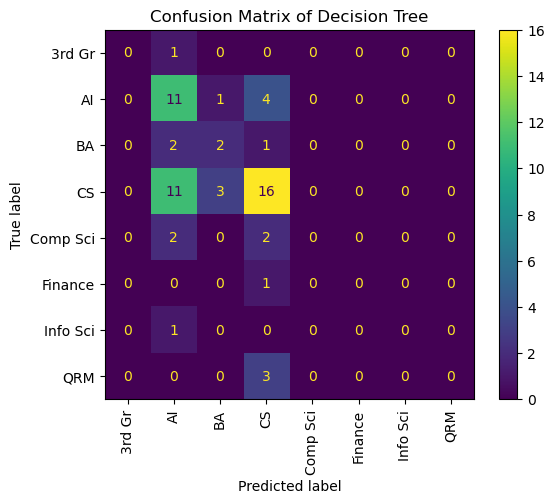

In [3]:
# Load the dataset
iris = pd.read_csv('new_data_fill_missing_linear&mode.csv')
iris = iris.dropna()

# Define the target variable and the feature matrix
target = iris['What programme are you in?']
iris = iris.drop(['What programme are you in?',"Tijdstempel",'Give a random number','What makes a good day for you (1)?',
                 'What makes a good day for you (2)?','When is your birthday (date)?','Time you went to bed Yesterday'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'max_depth': range(20),
    'min_samples_leaf': range(20),
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3]
}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score on the test set:", accuracy)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test,xticks_rotation='vertical')
plt.title("Confusion Matrix of Decision Tree")

# TASK 2B: WINNING CLASSIFICATION ALGORITHMS